<a href="https://colab.research.google.com/github/AryaHanaafi/DatasetMovieML/blob/main/movie_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task
olah dan analisis data ini

Here is all the data you need:
"Movie_Database.csv"

## Data loading

### Subtask:
Load the movie database data into a pandas DataFrame.


**Reasoning**:
Load the movie database data into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Movie_Database.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Movie_Database.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: 'utf-8' codec can't decode byte 0xe5 in position 202: invalid continuation byte


**Reasoning**:
The previous attempt failed due to a decoding error.  Let's try specifying the encoding as 'latin-1', which is often used for files with special characters.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Movie_Database.csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Movie_Database.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Movie,Year,Genres,Certification/Rating,IMDb ID,Writer,Director
0,300,2006,"Action, Drama",R,tt0416449,Zack Snyder,Zack Snyder
1,1408,2007,"Fantasy, Horror, Mystery",PG-13,tt0450385,Matt Greenberg,Mikael Håfström
2,2012,2009,"Action, Adventure, Sci-Fi",PG-13,tt1190080,Roland Emmerich,Roland Emmerich
3,12 Angry Men,1957,"Crime, Drama",Approved,tt0050083,Reginald Rose,Sidney Lumet
4,12 Strong,2018,"Action, Drama, History",R,tt1413492,Ted Tally,Nicolai Fuglsig


## Data exploration

### Subtask:
Explore the loaded movie data to understand its characteristics.


**Reasoning**:
Examine the data shape and information, calculate descriptive statistics for numerical columns, and identify potential issues. Then, create histograms for numerical features.



Data Shape: (616, 7)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie                 616 non-null    object
 1   Year                  616 non-null    int64 
 2   Genres                616 non-null    object
 3   Certification/Rating  592 non-null    object
 4   IMDb ID               616 non-null    object
 5   Writer                614 non-null    object
 6   Director              614 non-null    object
dtypes: int64(1), object(6)
memory usage: 33.8+ KB


None


Descriptive Statistics for Numerical Columns:


,Year
count,616.000000
mean,2007.631494
std,12.096989
min,1956.000000
25%,2002.750000
50%,2011.000000
75%,2015.000000
max,2023.000000



Potential Issues:
Missing values present.


,0
Movie,0
Year,0
Genres,0
Certification/Rating,24
IMDb ID,0
Writer,2
Director,2


No duplicated rows.

Inconsistent Data Types:


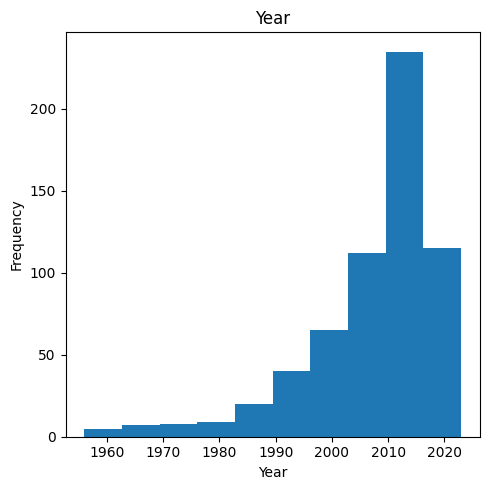

In [ ]:
# Examine Data Shape and Information
print("Data Shape:", df.shape)
print("\nData Information:")
display(df.info())

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())

# Identify potential issues
print("\nPotential Issues:")
if df.isnull().sum().any():
    print("Missing values present.")
    display(df.isnull().sum())
else:
    print("No missing values.")

if df.duplicated().any():
  print("Duplicated rows present.")
  display(df[df.duplicated()])
else:
  print("No duplicated rows.")

# Check for inconsistent data types (e.g. year should be numeric)
print("\nInconsistent Data Types:")
for col in ['Year']:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Column '{col}' is not numeric.  Actual type is {df[col].dtype}.")

# Histograms for numerical features
import matplotlib.pyplot as plt

df['Year'] = pd.to_numeric(df['Year'], errors='coerce') # Attempt to convert the 'Year' column to numeric

numerical_features = ['Year']
num_plots = len(numerical_features)
fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

for i, col in enumerate(numerical_features):
    if num_plots == 1:
        ax = axes
    else:
        ax = axes[i]

    df[col].plot(kind='hist', ax=ax, title=col)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Clean the movie data by handling missing values and inconsistencies.


**Reasoning**:
Fill missing values in specified columns, convert the 'Year' column to numeric type, and remove duplicate rows.



In [ ]:
# Fill missing values
for col in ['Certification/Rating', 'Writer', 'Director']:
    df[col] = df[col].fillna('Unknown')

# Convert 'Year' to numeric, coercing errors to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

display(df.head())
display(df.info())

,Movie,Year,Genres,Certification/Rating,IMDb ID,Writer,Director
0,300,2006,"Action, Drama",R,tt0416449,Zack Snyder,Zack Snyder
1,1408,2007,"Fantasy, Horror, Mystery",PG-13,tt0450385,Matt Greenberg,Mikael Håfström
2,2012,2009,"Action, Adventure, Sci-Fi",PG-13,tt1190080,Roland Emmerich,Roland Emmerich
3,12 Angry Men,1957,"Crime, Drama",Approved,tt0050083,Reginald Rose,Sidney Lumet
4,12 Strong,2018,"Action, Drama, History",R,tt1413492,Ted Tally,Nicolai Fuglsig


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie                 616 non-null    object
 1   Year                  616 non-null    int64 
 2   Genres                616 non-null    object
 3   Certification/Rating  616 non-null    object
 4   IMDb ID               616 non-null    object
 5   Writer                616 non-null    object
 6   Director              616 non-null    object
dtypes: int64(1), object(6)
memory usage: 33.8+ KB


None

## Data analysis

### Subtask:
Analyze the cleaned movie data to gain insights into its characteristics.


**Reasoning**:
Calculate descriptive statistics for numerical columns and analyze the distribution of categorical columns.  Also, explore relationships between 'Year' and 'Certification/Rating', and 'Director' and 'Genres'.



In [ ]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
display(df.describe(include='number'))

# Analyze distribution of categorical columns
categorical_cols = ['Genres', 'Certification/Rating', 'Director', 'Writer']
for col in categorical_cols:
    print(f"\nDistribution of '{col}':")
    display(df[col].value_counts())

# Explore relationship between 'Year' and 'Certification/Rating'
print("\nRelationship between 'Year' and 'Certification/Rating':")
display(pd.crosstab(df['Year'], df['Certification/Rating']))

# Explore relationship between 'Director' and 'Genres'
print("\nRelationship between 'Director' and 'Genres':")
director_genre_counts = df.groupby(['Director', 'Genres']).size().reset_index(name='Count')
display(director_genre_counts)

Descriptive Statistics for Numerical Columns:


,Year
count,616.000000
mean,2007.631494
std,12.096989
min,1956.000000
25%,2002.750000
50%,2011.000000
75%,2015.000000
max,2023.000000



Distribution of 'Genres':


,count
Genres,
"Action, Adventure, Sci-Fi",45
"Action, Adventure, Thriller",36
"Drama, Romance",31
"Action, Adventure, Drama",23
"Action, Adventure, Fantasy",23
...,...
"Adventure, Drama, Fantasy",1
"Fantasy, Mystery, Romance",1
"Action, Crime",1



Distribution of 'Certification/Rating':


,count
Certification/Rating,
PG-13,246
R,238
PG,64
Unknown,24
Not Rated,17
TV-MA,9
G,8
Unrated,6
Approved,1



Distribution of 'Director':


,count
Director,
Steven Spielberg,12
Ridley Scott,8
Edward Zwick,6
Justin Lin,6
Roland Emmerich,6
...,...
"Ethan Coen, Joel Coen",1
Wolfgang Petersen,1
John Moore,1



Distribution of 'Writer':


,count
Writer,
Richard Maibaum,9
James Cameron,7
Steven Knight,5
Lilly Wachowski,5
Chris Morgan,5
...,...
Rian Johnson,1
Al Gore,1
John Carlin,1



Relationship between 'Year' and 'Certification/Rating':


Certification/Rating,Approved,G,GP,NC-17,Not Rated,PG,PG-13,R,TV-14,TV-MA,Unknown,Unrated
Year,,,,,,,,,,,,
1956,0,0,0,0,2,0,0,0,0,0,0,0
1957,1,0,0,0,0,0,0,0,0,0,0,0
1961,0,0,0,0,1,0,0,0,0,0,0,0
1962,0,0,0,0,0,1,0,0,0,0,0,0
1963,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0,0,0,0,0,1,6,6,0,1,4,0
2020,0,0,0,0,0,0,8,2,0,0,1,1
2021,0,0,0,0,0,0,10,6,0,1,2,0



Relationship between 'Director' and 'Genres':


,Director,Genres,Count
0,Aaron Schneider,"Action, Drama, History",1
1,Adam Brooks,"Comedy, Drama, Romance",1
2,AgnÃ¨s Merlet,"Biography, Drama, History",1
3,Ainun Ridho,"Comedy, Drama, Romance",1
4,Aku Louhimies,"Drama, Romance",1
...,...,...,...
549,Zack Snyder,"Action, Adventure, Sci-Fi",2
550,Zack Snyder,"Action, Drama",1
551,Zack Snyder,"Action, Drama, Mystery",1
552,Zalman King,"Drama, Mystery, Romance",1


**Reasoning**:
Calculate the correlation matrix for numerical features and visualize it as a heatmap.



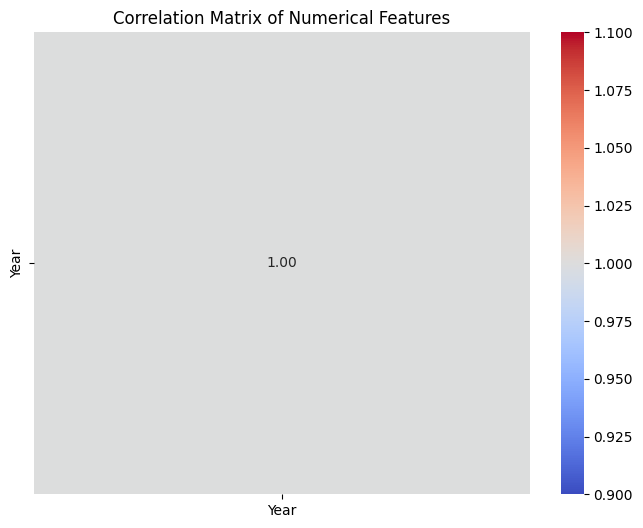

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features
numerical_features = ['Year']
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

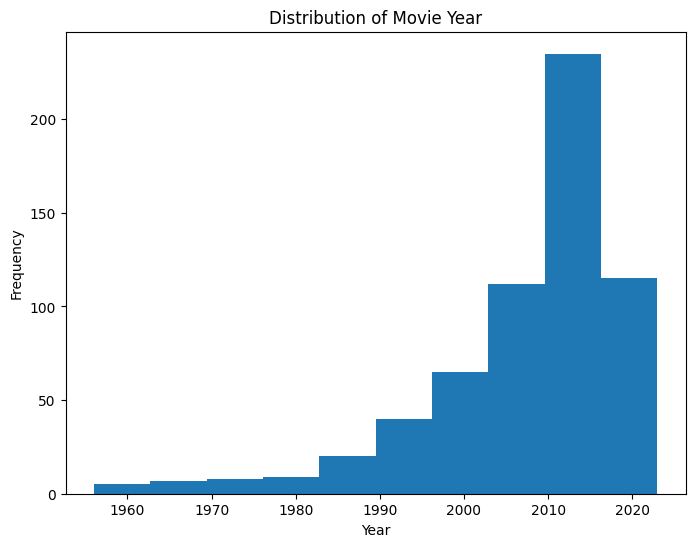

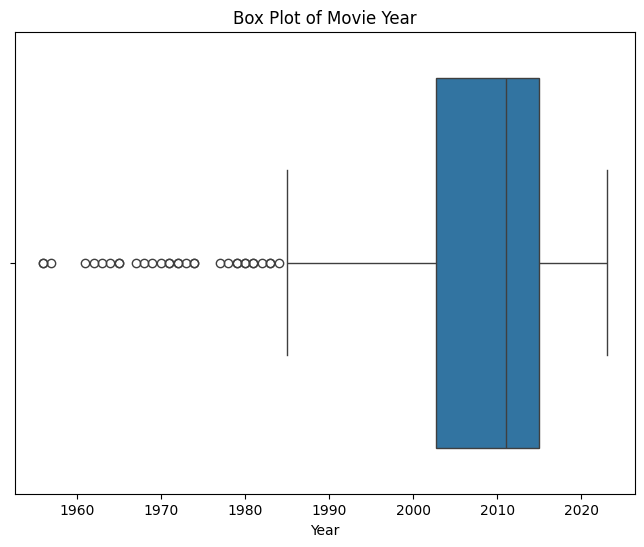

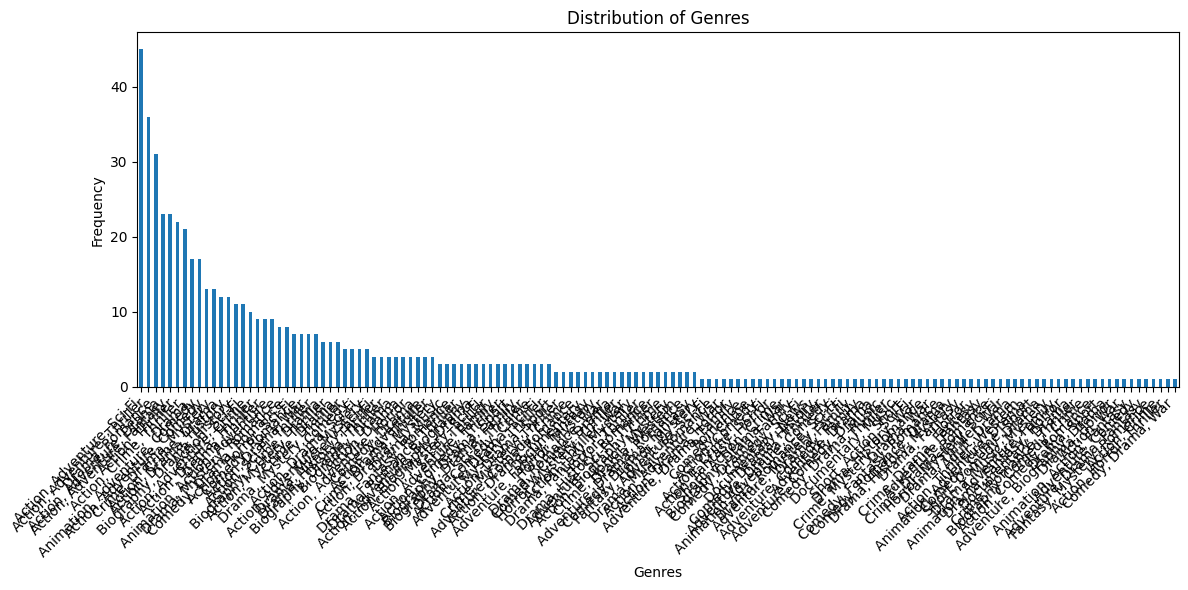

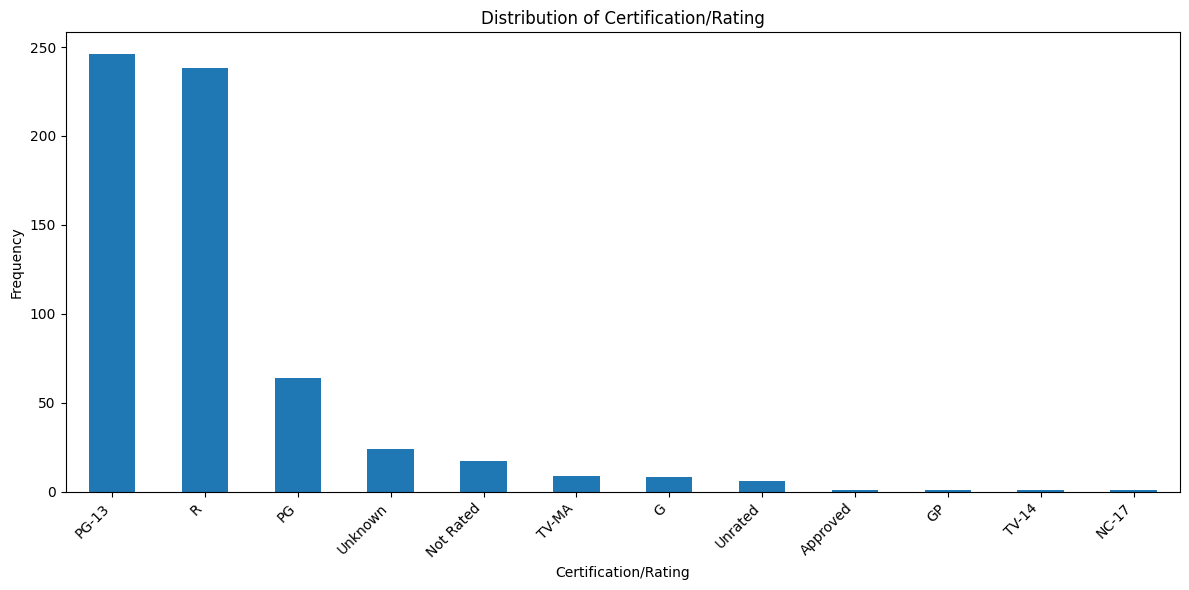

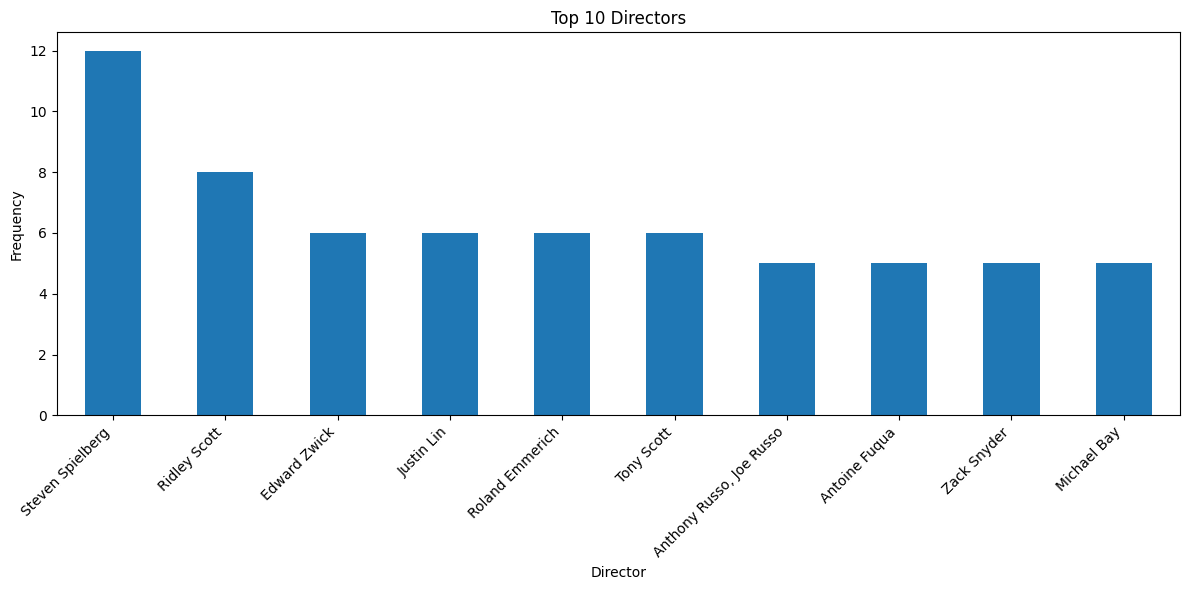

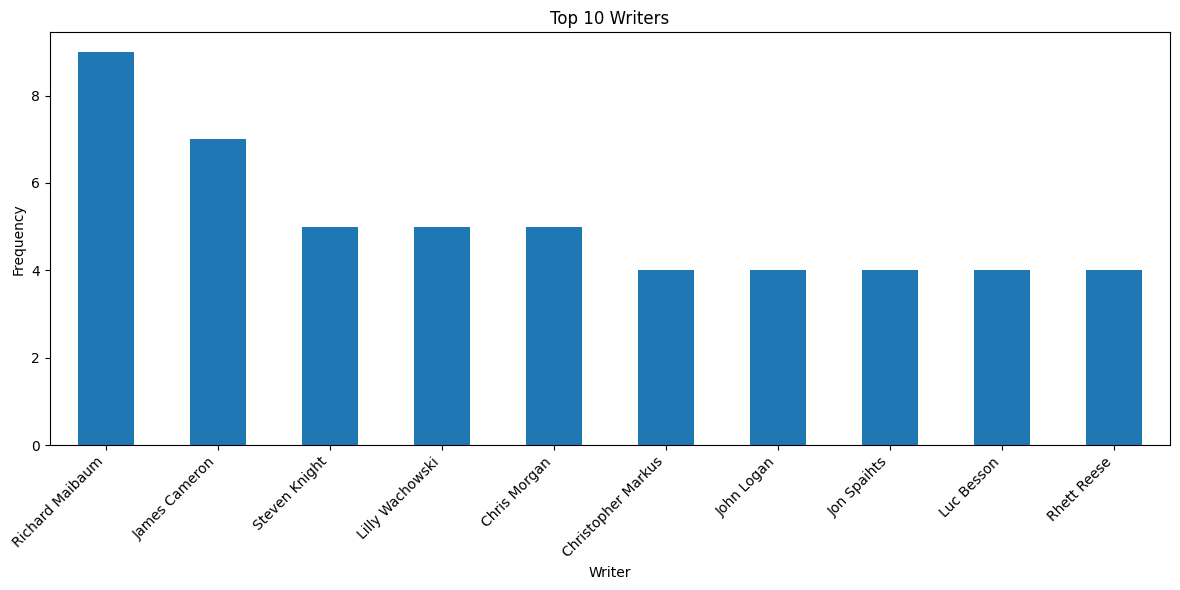

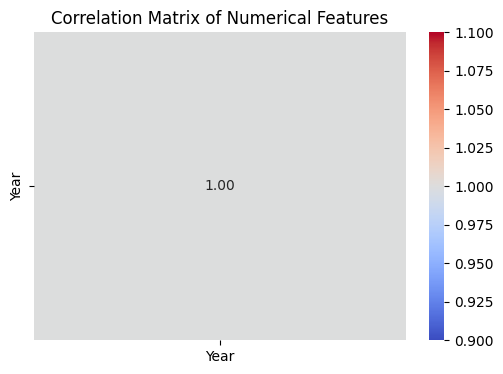

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(8, 6))
df['Year'].plot(kind='hist', title='Distribution of Movie Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Box plots for numerical features
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Year'])
plt.title('Box Plot of Movie Year')
plt.show()

# Bar charts for categorical features (limiting to top 10 for Director and Writer)
for col in ['Genres', 'Certification/Rating', 'Director', 'Writer']:
    plt.figure(figsize=(12, 6))
    if col in ['Director', 'Writer']:
        top_10 = df[col].value_counts().nlargest(10)
        top_10.plot(kind='bar', title=f'Top 10 {col}s')
    else:
        df[col].value_counts().plot(kind='bar', title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Scatter plot (if applicable and meaningful)
# No other numerical features to compare 'Year' against meaningfully

# Correlation matrix heatmap
numerical_features = ['Year']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()